### Problem Statement:
Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data
warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more
anomalies and common patterns can be discovered.

### Approach: 

The classical machine learning tasks like 
- Data Exploration, 
- Data Cleaning,
- Feature Engineering,
-  Model Building and 
-  Model Testing. 
 
 Try out different machine
learning algorithms that’s best fit for the above case.

In [3]:
!pip install matplotlib

  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl.metadata (5.8 kB)
  Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp38-cp38-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp38-cp38-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp38-cp38-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl (7.5 MB)
Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl (477 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp38-cp38-win_amd64.whl (1.5 MB)
Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
Using cached kiwisolver-1.4.7-cp38-cp38-win_amd64.whl (55 kB)
Using cached pillow-10.4.0-cp38-cp38-win_amd64.whl (2.6 MB)
U

In [4]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add the src folder to the system path
sys.path.append(os.path.abspath('../src'))

import logger

# Log the start of the notebook
logger.logging.info('importing necessary libraries for EDA')

##### Data Exploration

In [132]:
df=pd.read_csv('../data/train.csv')
logger.logging.info(f'reading data {df.head()}')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


`Item_Identifier:`           Unique product ID
 
`Item_Weight:`               Weight of product

`Item_Fat_Content:`          Whether the product is low fat or not'

`Item_Visibility:`           The % of total display area of all products in a store allocated to the
particular product

`Item_Type:`                 The category to which the product belongs

`Item_MRP:`                  Maximum Retail Price (list price) of the product

`Outlet_Identifier:`         Unique store ID

`Outlet_Establishment_Year:` The year in which store was established

`Outlet_Size:`               The size of the store in terms of ground area covered

`Outlet_Location_Type:`      The type of city in which the store is located

`Outlet_Type:`               Whether the outlet is just a grocery store or some sort of supermarket

`Item_Outlet_Sales:`         Sales of the product in the particulat store. This is the outcome
variable to be predicted.

In [133]:
data=df.copy()

In [51]:
data.tail() #printing last 5 rows of dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [134]:
data.info() #checking datatypes of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [53]:
logger.logging.info('exploring the dataset')
data.shape

(8523, 12)

##### Data Cleaning 

**`Missing Values`**

In [54]:
# Check for missing values
logger.logging.info(f'count of null values{data.isna().sum()}')
print(data.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [55]:
data['Item_Weight'].info()  #checking data type of Item_Weight columns

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Item_Weight
Non-Null Count  Dtype  
--------------  -----  
7060 non-null   float64
dtypes: float64(1)
memory usage: 66.7 KB


In [56]:
data['Outlet_Size'].info() #checking data type of Outlet_Size columns

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Outlet_Size
Non-Null Count  Dtype 
--------------  ----- 
6113 non-null   object
dtypes: object(1)
memory usage: 66.7+ KB


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Cross checking and correcting Each columns `values` and `DataTypes`** 

In [58]:
#checking dtypes and value count of Item_Identifier
logger.logging.info('Cross checking and correcting Each columns `values` and `DataTypes`')
print(data['Item_Identifier'].dtype)
data['Item_Identifier'].value_counts()

object


Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [59]:
#checking dtypes and value count of Item_Weight
print(data['Item_Weight'].dtype)
data['Item_Weight'].value_counts()

float64


Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64

In [60]:
#checking dtypes and value count of Item_Fat_Content
print(data['Item_Fat_Content'].dtype)
data['Item_Fat_Content'].value_counts()

object


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [61]:
#checking dtypes and value count of Item_Visibility
print(data['Item_Visibility'].dtype)
data['Item_Visibility'].value_counts()

float64


Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [62]:
#checking dtypes and value count of Item_Type
print(data['Item_Type'].dtype)
data['Item_Type'].value_counts()

object


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [63]:
#checking dtypes and value count of Item_MRP
print(data['Item_MRP'].dtypes)
data['Item_MRP'].value_counts()

float64


Item_MRP
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: count, Length: 5938, dtype: int64

In [64]:
#checking dtypes and value count of Outlet_Identifier
print(data['Outlet_Identifier'].dtype)
data['Outlet_Identifier'].value_counts()

object


Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [65]:
#checking dtypes and value count of Outlet_Establishment_Year
print(data['Outlet_Establishment_Year'].dtype)
data['Outlet_Establishment_Year'].value_counts()

int64


Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

In [66]:
#checking dtypes and value count of Outlet_Size
print(data['Outlet_Size'].dtype)
data['Outlet_Size'].value_counts()

object


Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [67]:
#checking dtypes and value count of Outlet_Location_Type
print(data['Outlet_Location_Type'].dtype)
data['Outlet_Location_Type'].value_counts()

object


Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [68]:
#checking dtypes and value count of Outlet_Type
print(data['Outlet_Type'].dtype)
data['Outlet_Type'].value_counts()

object


Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [69]:
#checking dtypes and value count of Item_Outlet_Sales
print(data['Item_Outlet_Sales'].dtype)
data['Item_Outlet_Sales'].value_counts()

float64


Item_Outlet_Sales
958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: count, Length: 3493, dtype: int64

In [70]:
#checking nulls 
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**`Imputation`**

In [138]:
#imputing item_weight with mean
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())
logger.logging.info(f'imputing mean value  for nulls present inside Item_Weight column')


In [137]:
print(data['Item_Weight'].mean())

12.857645184135976


In [140]:
#checking null values after imputation
data['Item_Weight'].isna().sum()

0

In [141]:
#diplaying data which has null values
logger.logging.info('printing the rows which contain nulls')
data[data.isnull().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [142]:
data[data.isnull().any(axis=1)]['Outlet_Type'].value_counts()
#we can observe that the rows which contain null values those outlet_type is supermarket Type1 and Grocery Store

Outlet_Type
Supermarket Type1    1855
Grocery Store         555
Name: count, dtype: int64

In [75]:
#chacking the values of outlet_size for Grocery store
data[data['Outlet_Type']=='Grocery Store']['Outlet_Size'].value_counts()

Outlet_Size
Small    528
Name: count, dtype: int64

In [76]:
#chacking the values of outlet_size for Grocery store
data[data['Outlet_Type']=='Supermarket Type1']['Outlet_Size'].value_counts()

Outlet_Size
Small     1860
High       932
Medium     930
Name: count, dtype: int64

In [77]:
data[(data['Outlet_Type']=='Supermarket Type1')]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
6,FDO10,13.65,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.75,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.6,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136


we can observe the when the `Outlet_Size` are Nan the `outlet_type` are only `Grocery store` and `Supermarket Type1`.
in this both `Grocery store` and `Supermarket Type1` the highest `Outlet_Size` values are `Small` so lets impute value `Small` for nan values

In [143]:
#imputing for Outlet_Size nulls
data['Outlet_Size'].fillna('Small',inplace=True)
logger.logging.info('imputing with mode value for Outlet_Size column')

In [144]:
# #checking nulls after imputation
logger.logging.info(f'count of null values after imputation/n {data.isna().sum()}')
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

`Handling Outliers`

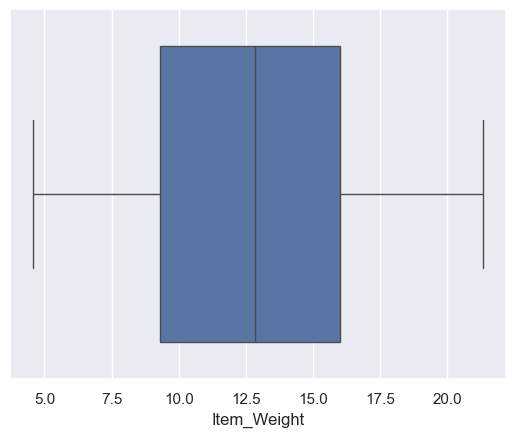

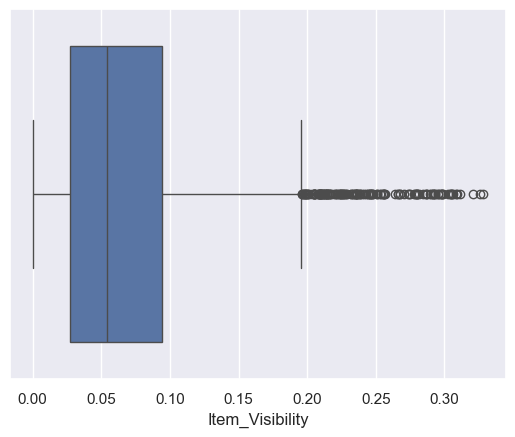

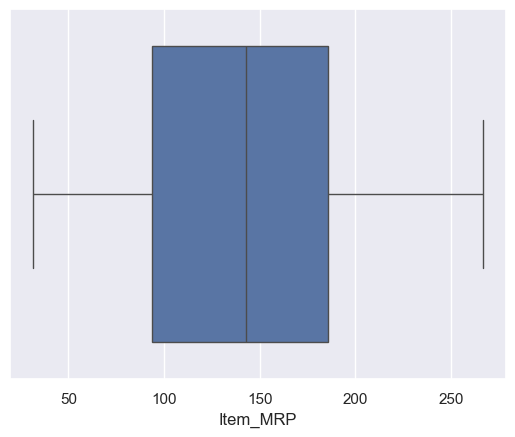

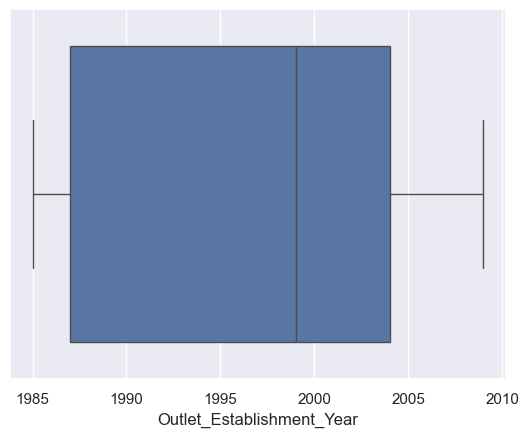

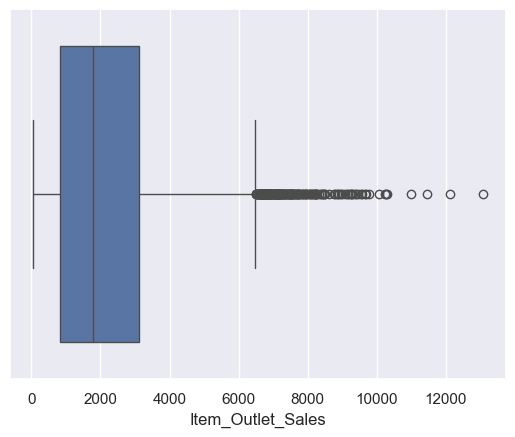

In [145]:
sns.set()
col=data.columns
for i in col:
    if data[i].dtype!='object':
        sns.boxplot(data=data,x=data[i])
        plt.show()

In [146]:
for i in col:
    if data[i].dtype!='object':
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR=Q3-Q1
        uf = Q3 + (1.5*IQR)
        lf = Q1 - (1.5*IQR)
        df=data[(data[i]<=uf) & (data[i]>=lf)]
logger.logging.info('Removing outlliers using IQR')

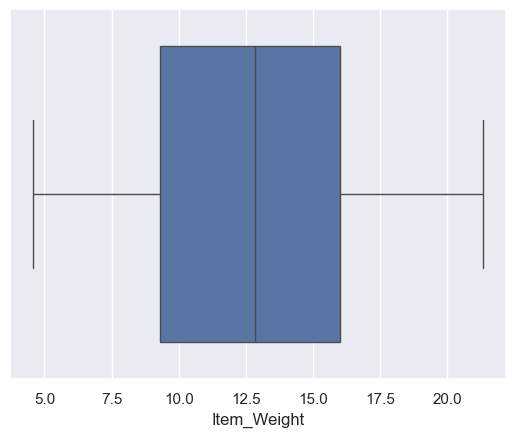

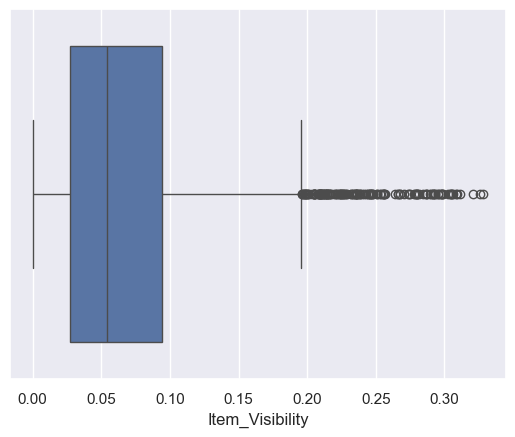

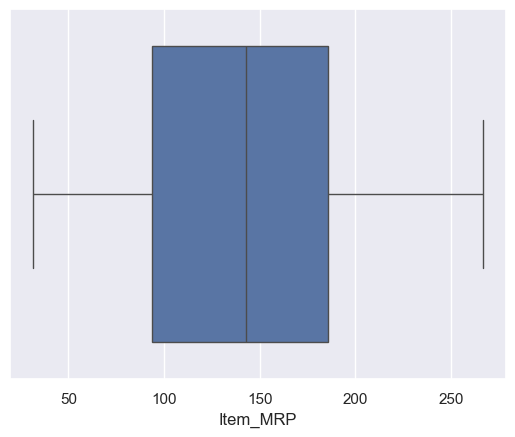

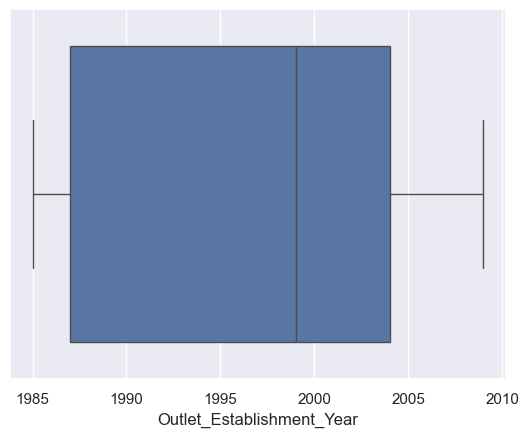

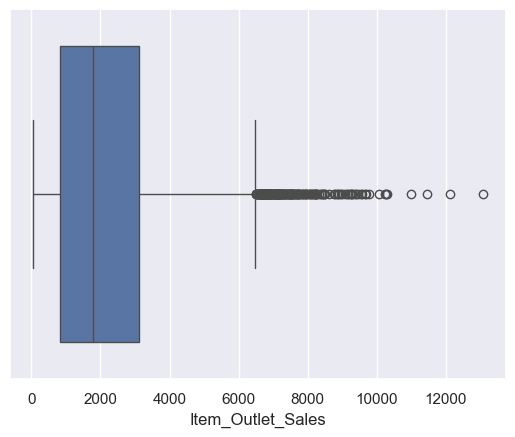

In [147]:
col=data.columns
for i in col:
    if data[i].dtype!='object':
        sns.boxplot(data=data,x=data[i])
        plt.show()

**`visualisation`**

In [148]:
#discrptive statistics of dataset
logger.logging.info(f'Descriptive statistics {data.describe()}')
data.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [149]:
import warnings
warnings.filterwarnings('ignore')
logger.logging.info('importing warnings')

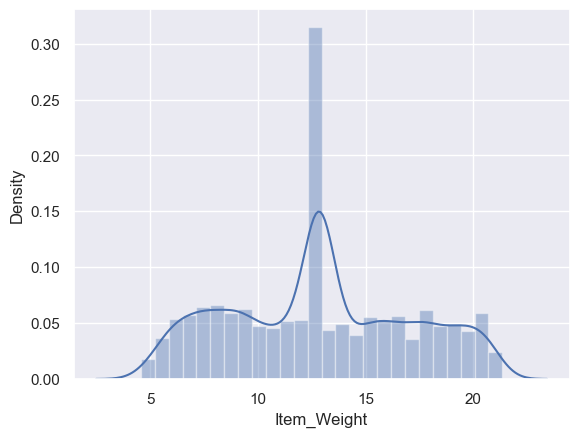

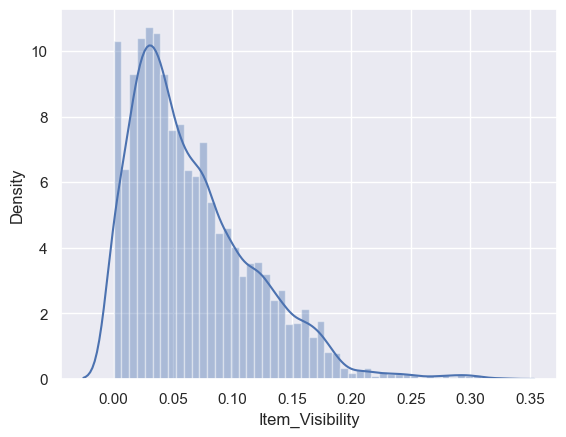

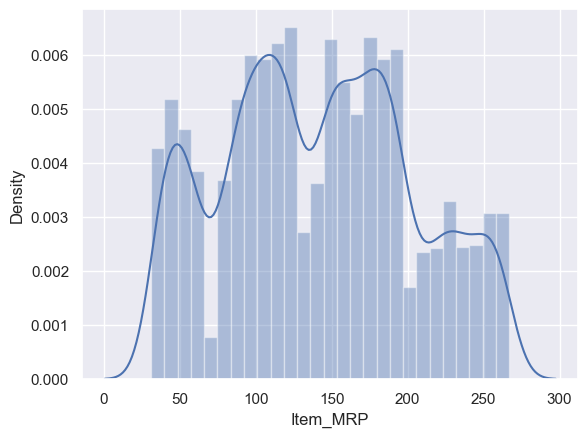

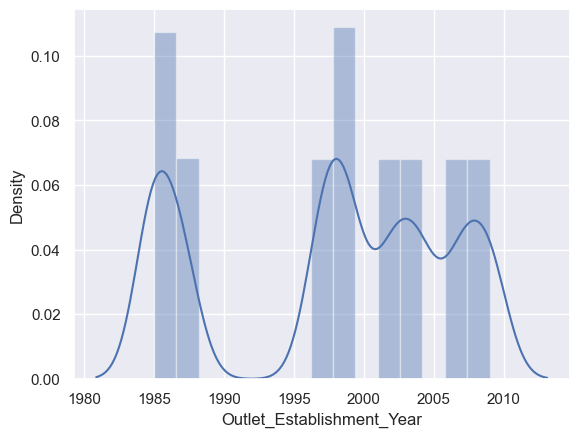

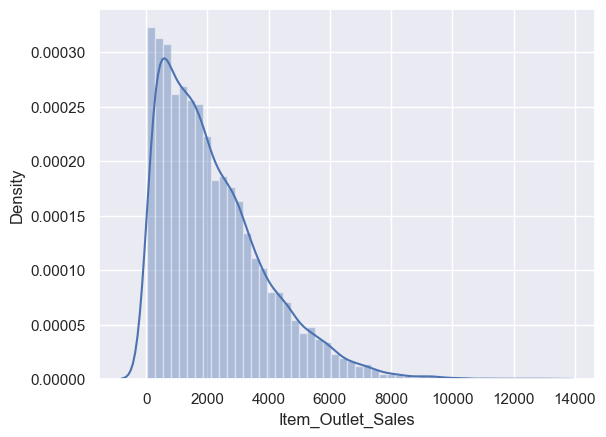

In [150]:
logger.logging.info(f'checking distribution of columns')
col=data.columns
for i in col:
    if data[i].dtype!='object':
        sns.distplot(data[i])
        plt.show()

<Axes: >

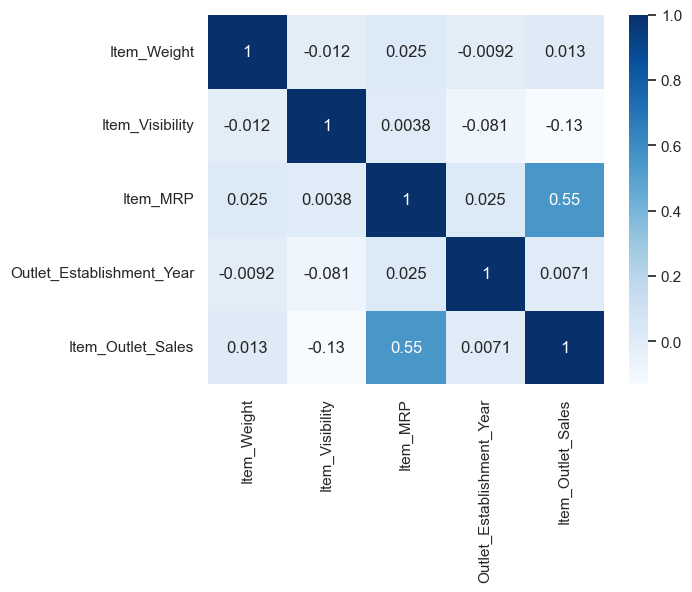

In [152]:
corr=df.select_dtypes(include=['number']).corr()
heat=sns.heatmap(corr,cmap='Blues',annot=True)
logger.logging.info(f'uderstanding correlation between numeric columns/n {heat}')
heat

##### Feature Engineering

`Data Tranformation`

In [87]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [153]:
data.drop(columns='Item_Identifier',inplace=True,axis=1)
logger.logging.info('Droping Item_Identifier column')

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [155]:
obj_columns=data.select_dtypes(include='object').columns
obj_columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [156]:
#encoding categorical data into numbers

data1=pd.get_dummies(data, columns=obj_columns,dtype=int)
logger.logging.info(f'one hot encoding the categorical data /n {data1.head()}')
data1.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [157]:
# Save the DataFrame to a CSV file
csv_file_path = os.path.join(os.getcwd(),'EDA_data.csv')
data1.to_csv(csv_file_path, index=False)
logger.logging.info(f"Data has been saved to {csv_file_path}")